In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l1, l2


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [4 7 1 8 5 2 9 8 7 3]


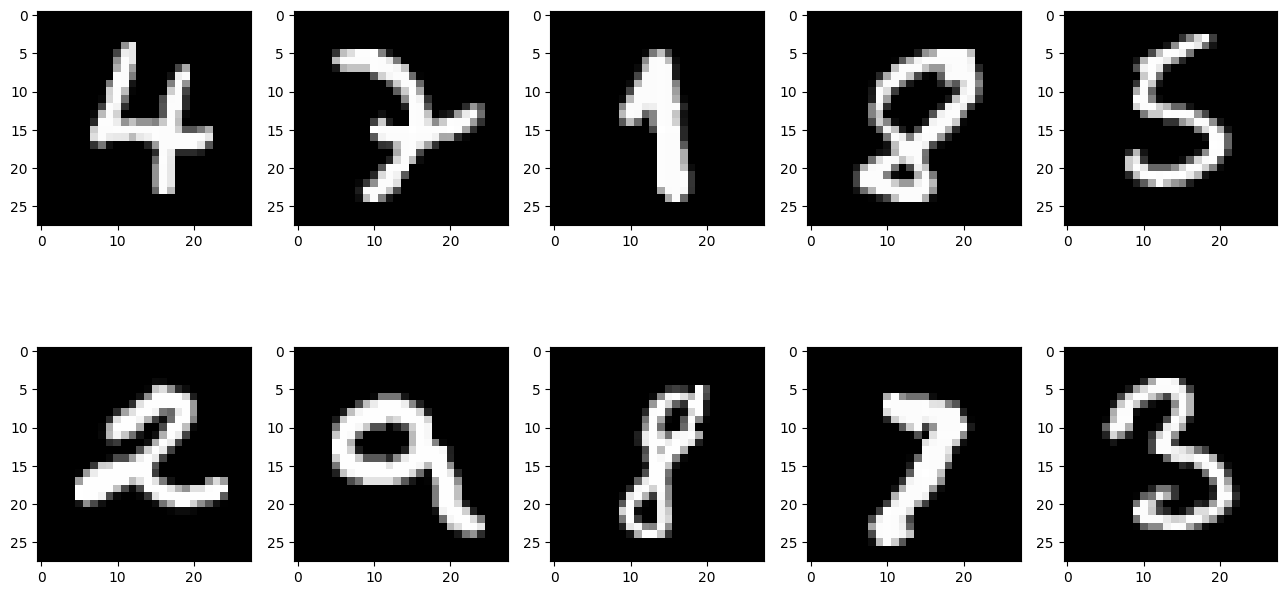

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [13]:
model=Sequential()

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [15]:
train_info = model.fit(new_train_data, new_train_target, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4756 - accuracy: 0.9114
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.9532
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2792 - accuracy: 0.9613
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9657
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2491 - accuracy: 0.9669
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2414 - accuracy: 0.9692
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2365 - accuracy: 0.9707
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2328 - accuracy: 0.9722
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2298 - accuracy: 0.9714
Epoch 10/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.230

Plot the loss and accuracy graphs

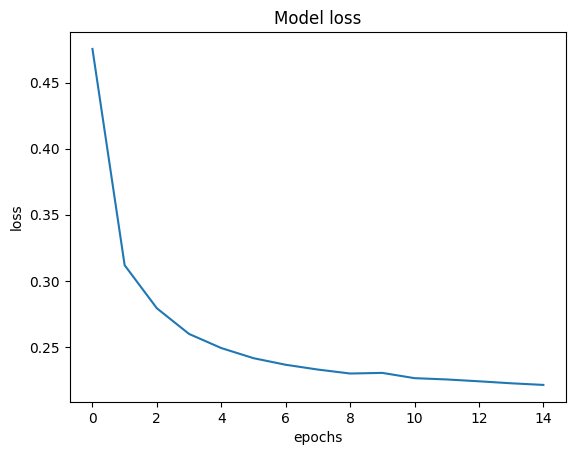

In [16]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

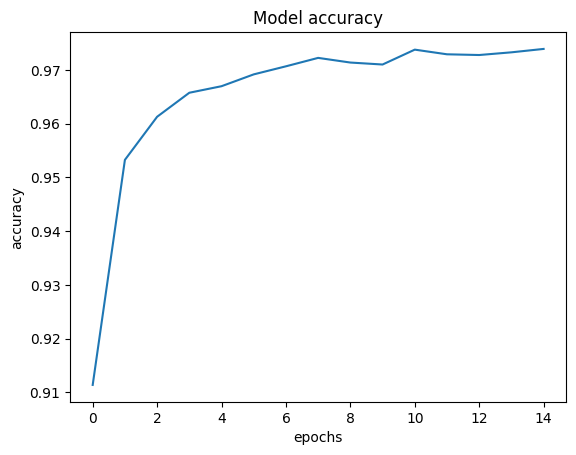

In [17]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

313/313 [==============================] - 2s 6ms/step


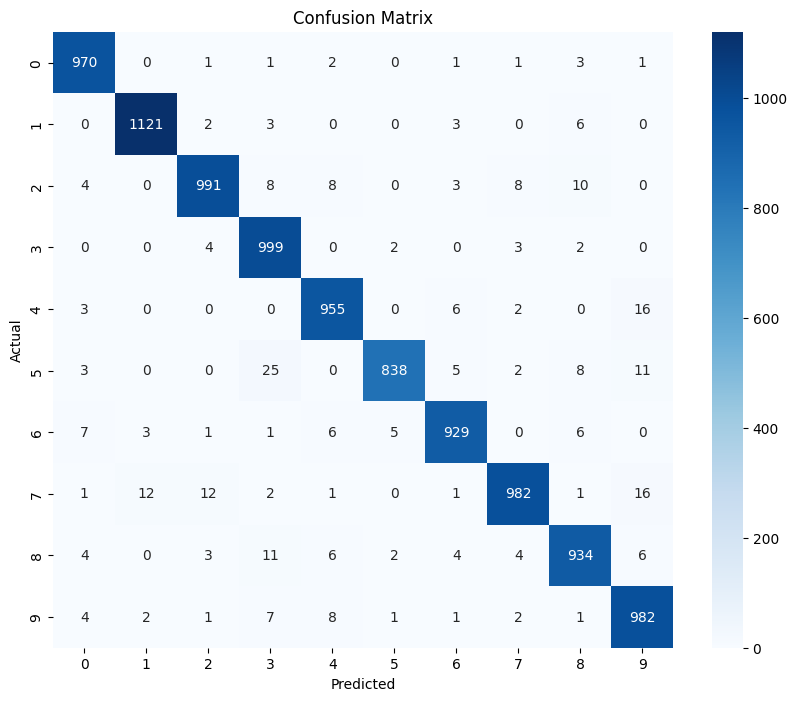

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for the test data
test_predictions = model.predict(new_test_data)

# Get the predicted classes
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_target, test_predictions_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Test the performance of Model

In [20]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9701
Loss of the Test dataset is: 0.2233925759792328
Accuracy of the test dataset is: 0.9700999855995178


Save the model weights

In [21]:
model.save_weights('MNIST_WEIGHTS_V1.h5')